In [129]:
import os, re, sys
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
import collections
import warnings

warnings.filterwarnings('ignore')

# get english stopwords from nltk
stop = stopwords.words('english')
stop.extend(['mr', 'mrs', 'ms', 'may', 'say', 'would', 'should', 'must', '000'])

# specifies path to text files
the_path = '/Users/zhope/Dropbox/My Mac (Zacharys-iMac.local)/Desktop/DIGS 30003 - Data Management/Orwell-pamphlet-collection-db/'

titles = []
texts = []
# df = pd.DataFrame(columns=['filename', 'text','text_processed','text_filtered')]

# iterate through all of the text files in the specified directory
for the_file in os.listdir(the_path):
    # but only files that have an extension of txt
    if the_file.endswith(".txt"):
        if os.path.isfile(os.path.join(the_path, the_file)):
            # read contents of file to variable f
            f = open(os.path.join(the_path, the_file), "r")
            # get all text between two anchors (***) you've inserted in text file
            text = re.search(r'(.*)\*{3}(.*?(?=\*{3}))\*{3}(.*)', f.read(), re.DOTALL)
            pamphlet = re.search(r'1899-ss-\d+-\d+\w?-(.*)', os.path.splitext(the_file)[0])
            titles.append(pamphlet[1])
            texts.append(text[0])

titles_text_tuples = list(zip(titles,texts))
df = pd.DataFrame(titles_text_tuples, columns = ['titles','text'])
df['text_processed'] = df['text'].map(lambda x: re.sub('[,\.!?]:', '', x))
df['text_processed'] = df['text_processed'].map(lambda x: x.lower())
df['text_filtered'] = df['text_processed'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop) and len(word) > 2]))
df['text_lemmatized'] = df['text_filtered'].apply(lambda x: ' '.join([porter.stem(word) for word in x.split()]))
df.head()

titles  \
0                            Economics_of_Capitalism   
1                Mr_Deakin_and_German_Responsibility   
2  Let's_Talk_it_Over_-_an_Argument_About_Sociali...   
3                                 Paying_for_the_War   
4  A_Letter_to_an_Industrial_Manager_(Fabian_Lett...   

                                                text  \
0  Economics of \nCapitalism\né\nAn Introductory ...   
1  Mr.. Deakin and \nGerman Responsibility\nBy JA...   
2  FABIAN \nSOCIETY\nr.\nEx-çee/icr,\nSHALL WE GO...   
3  M\n. \n1\nPAYING\nFOR THE WAR\nWilfred \nTowne...   
4  FABIAN\nTER TO AN\nINDUSTRIAL MANAGER\nG. D. H...   

                                      text_processed  \
0  economics of \ncapitalism\né\nan introductory ...   
1  mr.. deakin and \ngerman responsibility\nby ja...   
2  fabian \nsociety\nr.\nex-çee/icr,\nshall we go...   
3  m\n. \n1\npaying\nfor the war\nwilfred \ntowne...   
4  fabian\nter to an\nindustrial manager\ng. d. h...   

                                       text_filtered  \
0  economics capitalism introductory outline dobb...   
1  mr.. deakin german responsibility james walker...   
2  fabian society ex-çee/icr, shall back efs talk...   
3  paying war wilfred townend bachelor arts, bach...   
4  fabian ter industrial manager cole fabian ter ...   

                                     text_lemmatized  
0  econom capit introductori outlin dobb publish ...  
1  mr.. deakin german respons jame walker, j.p., ...  
2  fabian societi ex-çee/icr, shall back ef talk ...  
3  pay war wilfr townend bachelor arts, bachelor ...  
4  fabian ter industri manag cole fabian ter fabi...

In [126]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

porter = PorterStemmer()

Tot = len(df)
Cols = 3

Rows = Tot // Cols 
Rows += Tot % Cols
Position = range(1,Tot + 1)
fig = plt.figure(1,figsize=(30,3 * Tot),tight_layout=True)
for index, row in df.iterrows():
    wordcount = {}
    for word in row['text_lemmatized'].split():
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1
    word_counter = collections.Counter(wordcount)
    lst = word_counter.most_common(10)
    labels, values = zip(*lst)
    # indexes = np.arange(len(labels))
    ax = fig.add_subplot(Rows,Cols,Position[index])
#     ax.set_xlabel('word')
#     ax.set_ylabel('count')
    ax.set_title(row['titles'], fontsize=15)
    plt.xticks(rotation=45, fontsize=12)
    plt.bar(labels, values)

plt.show();

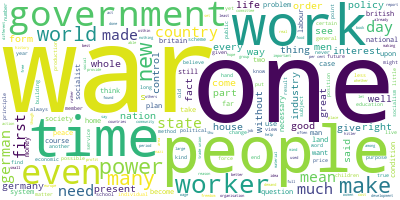

In [120]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df['text_filtered'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

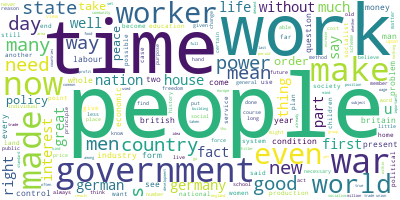

In [123]:
stopwar = ['war','one','will','may','must']
df['text_nowar'] = df['text_processed'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwar)]))
nowar_string = ','.join(list(df['text_nowar'].values))
wordcloud.generate(nowar_string)
wordcloud.to_image()

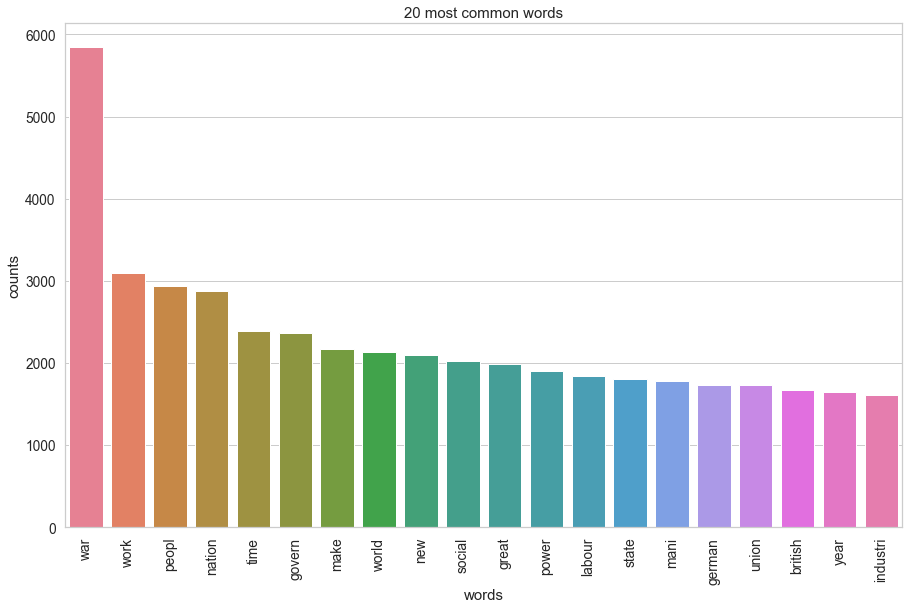

In [130]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_20_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='20 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x=x_pos, y=counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['text_lemmatized'])
# Visualise the 20 most common words
plot_20_most_common_words(count_data, count_vectorizer)

In [134]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 10
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
war german germani hitler peopl british soviet germany world nazi

Topic #1:
christian life women soviet man work world human social church

Topic #2:
war hous nation work govern industri new good build 000

Topic #3:
war peopl work labour nation social world socialist class state

Topic #4:
church french roman christian cathol franc right polici centuri pope

Topic #5:
union trade coloni labour work children school worker educ women

Topic #6:
employ public capit unemploy invest chapter good demand consumers wealth

Topic #7:
econom postag peac id spiritu life professor civilis human reconstruct

Topic #8:
local land plan govern india author area indian prison council

Topic #9:
board incom plan tax social allow scheme beveridg servic work


In [135]:
%%time
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))

LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

CPU times: user 1.39 s, sys: 51.8 ms, total: 1.45 s
Wall time: 3.73 s


In [136]:
from IPython.display import HTML
warnings.filterwarnings('ignore')

HTML(filename='./ldavis_prepared_'+ str(number_topics) +'.html')

In [72]:
%%time
import gensim
from gensim.utils import simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data = df.text_filtered.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['economics', 'capitalism', 'introductory', 'outline', 'dobb', 'published', 'marx', 'memorial', 'library', 'workers', 'school', 'lawrence', 'wishart', 'ltd', 'farteigh', 'press', 'beechwood', 'works', 'beechsvood', 'rise', 'watford', 'herts', 'introduction', 'capitalism', 'system', 'cut', 'certain', 'pattern', 'remains', 'time', 'product', 'complex', 'process', 'historical', 'development', 'capitalism', 'continually', 'subject', 'historical', 'development', 'changes', 'one', 'decade', 'next', 'different', 'many', 'respects', 'one', 'country', 'another', 'country', 'according', 'specific', 'features', 'country', 'according', 'peculiarities', 'country', 'history', 'transition', 'capitalism', 'socialism', 'the', 'period', 'working', 'class', 'revolution', 'also', 'occupies', 'whole', 'historical', 'epoch', 'forms', 'stages', 'passes', 'determined', 'specific', 'conditions', 'internal', 'particular', 'country', 'well', 'external', 'relations', 'country', 'situation', 'world', 'large', 'mu

In [73]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [74]:
stop.extend(['from', 'subject', 're', 'edu', 'use'])
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [75]:
import spacy
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])

[['economic', 'capitalism', 'introductory', 'publish', 'library', 'worker', 'beechwood', 'work', 'beechsvood', 'rise', 'introduction', 'capitalism', 'system', 'cut', 'certain', 'pattern', 'remain', 'time', 'product', 'complex', 'process', 'historical', 'development', 'capitalism', 'continually', 'historical', 'development', 'change', 'decade', 'different', 'many', 'respect', 'country', 'country', 'accord', 'specific', 'feature', 'country', 'accord', 'peculiarity', 'country', 'history', 'transition', 'capitalism', 'socialism', 'also', 'occupy', 'whole', 'historical', 'epoch', 'form', 'stage', 'pass', 'determine', 'specific', 'condition', 'internal', 'particular', 'country', 'external', 'relation', 'country', 'situation', 'world', 'large', 'must', 'borne_mind', 'appreciate', 'importance', 'concrete', 'study', 'detailed', 'situation', 'give', 'time', 'place', 'complete', 'understanding', 'mean', 'valuable', 'pick', 'study', 'certain', 'general', 'feature', 'capitalism', 'isolate', 'certai

In [76]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1])

[[(0, 1), (1, 2), (2, 4), (3, 4), (4, 2), (5, 2), (6, 2), (7, 1), (8, 1), (9, 2), (10, 1), (11, 4), (12, 4), (13, 5), (14, 6), (15, 3), (16, 3), (17, 3), (18, 1), (19, 2), (20, 6), (21, 3), (22, 3), (23, 1), (24, 1), (25, 1), (26, 2), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 2), (33, 2), (34, 2), (35, 4), (36, 1), (37, 1), (38, 1), (39, 3), (40, 1), (41, 1), (42, 2), (43, 3), (44, 5), (45, 2), (46, 1), (47, 2), (48, 1), (49, 2), (50, 2), (51, 1), (52, 1), (53, 7), (54, 14), (55, 2), (56, 1), (57, 1), (58, 4), (59, 2), (60, 1), (61, 1), (62, 10), (63, 3), (64, 2), (65, 1), (66, 1), (67, 1), (68, 3), (69, 1), (70, 1), (71, 1), (72, 3), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 5), (79, 1), (80, 2), (81, 1), (82, 2), (83, 2), (84, 1), (85, 6), (86, 1), (87, 1), (88, 2), (89, 2), (90, 2), (91, 1), (92, 1), (93, 1), (94, 3), (95, 1), (96, 1), (97, 1), (98, 2), (99, 5), (100, 3), (101, 1), (102, 2), (103, 2), (104, 3), (105, 1), (106, 2), (107, 4), (108, 1), (109, 1), (110, 

In [77]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [78]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.008*"would" + 0.008*"war" + 0.006*"may" + 0.006*"make" + 0.006*"land" + '
  '0.005*"building" + 0.005*"industry" + 0.005*"country" + 0.005*"new" + '
  '0.005*"must"'),
 (1,
  '0.008*"child" + 0.008*"school" + 0.007*"education" + 0.007*"may" + '
  '0.006*"work" + 0.006*"church" + 0.006*"would" + 0.006*"make" + 0.004*"man" '
  '+ 0.004*"well"'),
 (2,
  '0.013*"german" + 0.010*"say" + 0.007*"make" + 0.007*"war" + 0.007*"must" + '
  '0.007*"people" + 0.006*"would" + 0.006*"time" + 0.005*"may" + '
  '0.005*"great"'),
 (3,
  '0.011*"war" + 0.008*"people" + 0.007*"would" + 0.006*"make" + '
  '0.006*"government" + 0.006*"world" + 0.005*"must" + 0.005*"power" + '
  '0.005*"may" + 0.004*"country"'),
 (4,
  '0.011*"would" + 0.011*"money" + 0.008*"war" + 0.007*"pay" + 0.006*"make" + '
  '0.005*"price" + 0.005*"interest" + 0.005*"debt" + 0.005*"good" + '
  '0.005*"plan"'),
 (5,
  '0.009*"would" + 0.007*"worker" + 0.007*"make" + 0.007*"work" + 0.006*"war" '
  '+ 0.006*"people" + 0.005*"hou

In [79]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.28535635662443115


In [80]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b,
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [82]:
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()


  0%|          | 0/540 [01:26<?, ?it/s]

 28%|██▊       | 150/540 [39:59<1:39:26, 15.30s/it]


 55%|█████▍    | 296/540 [1:18:59<1:13:54, 18.18s/it]


 82%|████████▏ | 443/540 [2:03:34<29:45, 18.41s/it]


100%|██████████| 540/540 [2:33:14<00:00, 17.03s/it]


In [89]:
lda_final_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.91,
                                           eta=0.61)

In [90]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_final_model, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.053185  0.025252       1        1  44.573952
0      0.024994  0.036436       2        1  23.582310
1      0.019490  0.036408       3        1  18.494595
2     -0.059491 -0.050218       4        1   8.986374
4      0.068191 -0.047877       5        1   4.362770, topic_info=            Term         Freq        Total Category  logprob  loglift
564       german  1323.000000  1323.000000  Default  30.0000  30.0000
1468       would  3832.000000  3832.000000  Default  29.0000  29.0000
1435         war  4323.000000  4323.000000  Default  28.0000  28.0000
1157         say  1963.000000  1963.000000  Default  27.0000  27.0000
920          pay   831.000000   831.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
1463        work    69.542032  2441.907668   Topic5  -5.8586  -0.4265
575   government    69.161822  2356.738611   Topic5  -5.8641  -0.3965
795         mean    64.752705  1492.035144   Topic5  -5.9300  -0.0053
771          man    66.298088  2063.341697   Topic5  -5.9064  -0.3059
928       people    65.459489  3593.509581   Topic5  -5.9191  -0.8734

[431 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
9515       1  0.062469  absenteeism
9515       2  0.062469  absenteeism
9515       3  0.812099  absenteeism
9515       5  0.062469  absenteeism
14476      1  0.189181      actuary
...      ...       ...          ...
4591       5  0.010982        youth
6913       1  0.037519         zone
6913       2  0.862948         zone
6913       3  0.037519         zone
6913       4  0.037519         zone

[1508 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 3, 5])